In [9]:
## Adding static factory method simulate()

import numpy as np
import scipy as spi
import unittest
import matplotlib.pyplot as plt


class SignalDetection:
    def __init__(self, hits, misses, false_alarms, correct_rejections):
        self.hits = hits
        self.misses = misses
        self.false_alarms = false_alarms
        self.correct_rejections = correct_rejections
    
    def hit_rate(self):
        return (self.hits / (self.hits + self.misses))

    def false_alarm_rate(self):
        return (self.false_alarms / (self.false_alarms + self.correct_rejections))

    def d_prime(self):
        return (spi.stats.norm.ppf(self.hit_rate()) - spi.stats.norm.ppf(self.false_alarm_rate()))

    def criterion(self):
        return -0.5 * (spi.stats.norm.ppf(self.hit_rate()) + spi.stats.norm.ppf(self.false_alarm_rate()))
    
    def __add__(self, other):
        return SignalDetection(self.hits + other.hits, self.misses + other.misses, self.false_alarms + other.false_alarms, self.correct_rejections + other.correct_rejections)
    
    def __mul__(self, scalar):
        return SignalDetection(self.hits * scalar, self.misses * scalar, self.false_alarms * scalar, self.correct_rejections * scalar)
    
    @staticmethod 
    def simulate(dprime, criteriaList, signalCount, noiseCount):
        sdtList = []
        for i in range(len(criteriaList)):
            criterion = criteriaList[i]
            k = criterion + (dprime/2)
            hitrate = 1 - spi.stats.norm.cdf(k - dprime)
            falsealarmrate = 1 - spi.stats.norm.cdf(k)
            hits = np.random.binomial(signalCount, hitrate)
            misses = signalCount - hits
            false_alarms = np.random.binomial(noiseCount, falsealarmrate)
            correct_rejections = noiseCount - false_alarms
            sdtList.append(SignalDetection(hits, misses, false_alarms, correct_rejections))
        return sdtList

sdtList = [SignalDetection(20, 10, 5, 10), SignalDetection(25, 5, 10, 5), SignalDetection(30, 15, 1, 15), SignalDetection(8, 2, 2, 8)]

import numpy as np
import unittest
import matplotlib.pyplot as plt
class TestSignalDetection(unittest.TestCase):
    """
    Test suite for SignalDetection class.
    """

    def test_d_prime_zero(self):
        """
        Test d-prime calculation when hits and false alarms are 0.
        """
        sd   = SignalDetection(15, 5, 15, 5)
        expected = 0
        obtained = sd.d_prime()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_d_prime_nonzero(self):
        """
        Test d-prime calculation when hits and false alarms are nonzero.
        """
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.421142647060282
        obtained = sd.d_prime()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_zero(self):
        """
        Test criterion calculation when hits and false alarms are both 0.
        """
        sd   = SignalDetection(5, 5, 5, 5)
        expected = 0
        obtained = sd.criterion()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_nonzero(self):
        """
        Test criterion calculation when hits and false alarms are nonzero.
        """
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.463918426665941
        obtained = sd.criterion()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_addition(self):
        """
        Test addition of two SignalDetection objects.
        """
        sd = SignalDetection(1, 1, 2, 1) + SignalDetection(2, 1, 1, 3)
        expected = SignalDetection(3, 2, 3, 4).criterion()
        obtained = sd.criterion()
        self.assertEqual(obtained, expected)

    def test_multiplication(self):
        """
        Test multiplication of a SignalDetection object with a scalar.
        """
        sd = SignalDetection(1, 2, 3, 1) * 4
        expected = SignalDetection(4, 8, 12, 4).criterion()
        obtained = sd.criterion()
        self.assertEqual(obtained, expected)

    def test_simulate_single_criterion(self):
        """
        Test SignalDetection.simulate method with a single criterion value.
        """
        dPrime       = 1.5
        criteriaList = [0]
        signalCount  = 1000
        noiseCount   = 1000
        
        sdtList      = SignalDetection.simulate(dPrime, criteriaList, signalCount, noiseCount)
        self.assertEqual(len(sdtList), 1)
        sdt = sdtList[0]
        
        self.assertEqual(sdt.hits             , sdtList[0].hits)
        self.assertEqual(sdt.misses           , sdtList[0].misses)
        self.assertEqual(sdt.false_alarms      , sdtList[0].false_alarms)
        self.assertEqual(sdt.correct_rejections, sdtList[0].correct_rejections)

    def test_simulate_multiple_criteria(self):
        """
        Test SignalDetection.simulate method with multiple criterion values.
        """
        dPrime       = 1.5
        criteriaList = [-0.5, 0, 0.5]
        signalCount  = 1000
        noiseCount   = 1000
        sdtList      = SignalDetection.simulate(dPrime, criteriaList, signalCount, noiseCount)
        self.assertEqual(len(sdtList), 3)
        for sdt in sdtList:
            self.assertLessEqual (sdt.hits              ,  signalCount)
            self.assertLessEqual (sdt.misses            ,  signalCount)
            self.assertLessEqual (sdt.false_alarms       ,  noiseCount)
            self.assertLessEqual (sdt.correct_rejections ,  noiseCount)
if __name__ == '__main__':
    unittest.main(argv=['ignored'], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.017s

OK


........
----------------------------------------------------------------------
Ran 8 tests in 0.012s

OK


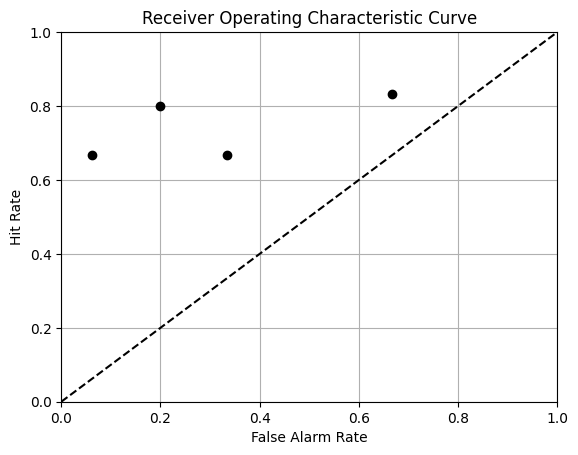

In [13]:
## Adding static method plot_roc()

import numpy as np
import scipy as spi
import unittest
import matplotlib.pyplot as plt


class SignalDetection:
    def __init__(self, hits, misses, false_alarms, correct_rejections):
        self.hits = hits
        self.misses = misses
        self.false_alarms = false_alarms
        self.correct_rejections = correct_rejections
    
    def hit_rate(self):
        return (self.hits / (self.hits + self.misses))

    def false_alarm_rate(self):
        return (self.false_alarms / (self.false_alarms + self.correct_rejections))

    def d_prime(self):
        return (spi.stats.norm.ppf(self.hit_rate()) - spi.stats.norm.ppf(self.false_alarm_rate()))

    def criterion(self):
        return -0.5 * (spi.stats.norm.ppf(self.hit_rate()) + spi.stats.norm.ppf(self.false_alarm_rate()))
    
    def __add__(self, other):
        return SignalDetection(self.hits + other.hits, self.misses + other.misses, self.false_alarms + other.false_alarms, self.correct_rejections + other.correct_rejections)
    
    def __mul__(self, scalar):
        return SignalDetection(self.hits * scalar, self.misses * scalar, self.false_alarms * scalar, self.correct_rejections * scalar)
    
    @staticmethod 
    def simulate(dprime, criteriaList, signalCount, noiseCount):
        sdtList = []
        for i in range(len(criteriaList)):
            criterion = criteriaList[i]
            k = criterion + (dprime/2)
            hitrate = 1 - spi.stats.norm.cdf(k - dprime)
            falsealarmrate = 1 - spi.stats.norm.cdf(k)
            hits = np.random.binomial(signalCount, hitrate)
            misses = signalCount - hits
            false_alarms = np.random.binomial(noiseCount, falsealarmrate)
            correct_rejections = noiseCount - false_alarms
            sdtList.append(SignalDetection(hits, misses, false_alarms, correct_rejections))
        return sdtList
    
    @staticmethod
    def plot_roc(sdtList):
        plt.figure()
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xlabel("False Alarm Rate")
        plt.ylabel("Hit Rate")
        plt.title("Receiver Operating Characteristic Curve")
        for sdt in sdtList:
            plt.plot(sdt.false_alarm_rate(), sdt.hit_rate(), 'o', color = 'black')
        x, y = np.linspace(0,1,100), np.linspace(0,1,100)
        plt.plot(x,y, '--', color = 'black')
        plt.grid()


sdtList = [SignalDetection(20, 10, 5, 10), SignalDetection(25, 5, 10, 5), SignalDetection(30, 15, 1, 15), SignalDetection(8, 2, 2, 8)]
SignalDetection.plot_roc(sdtList)

class TestSignalDetection(unittest.TestCase):
    """
    Test suite for SignalDetection class.
    """

    def test_d_prime_zero(self):
        """
        Test d-prime calculation when hits and false alarms are 0.
        """
        sd   = SignalDetection(15, 5, 15, 5)
        expected = 0
        obtained = sd.d_prime()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_d_prime_nonzero(self):
        """
        Test d-prime calculation when hits and false alarms are nonzero.
        """
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.421142647060282
        obtained = sd.d_prime()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_zero(self):
        """
        Test criterion calculation when hits and false alarms are both 0.
        """
        sd   = SignalDetection(5, 5, 5, 5)
        expected = 0
        obtained = sd.criterion()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_nonzero(self):
        """
        Test criterion calculation when hits and false alarms are nonzero.
        """
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.463918426665941
        obtained = sd.criterion()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_addition(self):
        """
        Test addition of two SignalDetection objects.
        """
        sd = SignalDetection(1, 1, 2, 1) + SignalDetection(2, 1, 1, 3)
        expected = SignalDetection(3, 2, 3, 4).criterion()
        obtained = sd.criterion()
        self.assertEqual(obtained, expected)

    def test_multiplication(self):
        """
        Test multiplication of a SignalDetection object with a scalar.
        """
        sd = SignalDetection(1, 2, 3, 1) * 4
        expected = SignalDetection(4, 8, 12, 4).criterion()
        obtained = sd.criterion()
        self.assertEqual(obtained, expected)

    def test_simulate_single_criterion(self):
        """
        Test SignalDetection.simulate method with a single criterion value.
        """
        dPrime       = 1.5
        criteriaList = [0]
        signalCount  = 1000
        noiseCount   = 1000
        
        sdtList      = SignalDetection.simulate(dPrime, criteriaList, signalCount, noiseCount)
        self.assertEqual(len(sdtList), 1)
        sdt = sdtList[0]
        
        self.assertEqual(sdt.hits             , sdtList[0].hits)
        self.assertEqual(sdt.misses           , sdtList[0].misses)
        self.assertEqual(sdt.false_alarms      , sdtList[0].false_alarms)
        self.assertEqual(sdt.correct_rejections, sdtList[0].correct_rejections)

    def test_simulate_multiple_criteria(self):
        """
        Test SignalDetection.simulate method with multiple criterion values.
        """
        dPrime       = 1.5
        criteriaList = [-0.5, 0, 0.5]
        signalCount  = 1000
        noiseCount   = 1000
        sdtList      = SignalDetection.simulate(dPrime, criteriaList, signalCount, noiseCount)
        self.assertEqual(len(sdtList), 3)
        for sdt in sdtList:
            self.assertLessEqual (sdt.hits              ,  signalCount)
            self.assertLessEqual (sdt.misses            ,  signalCount)
            self.assertLessEqual (sdt.false_alarms       ,  noiseCount)
            self.assertLessEqual (sdt.correct_rejections ,  noiseCount)
if __name__ == '__main__':
    unittest.main(argv=['ignored'], exit=False)


.........
----------------------------------------------------------------------
Ran 9 tests in 0.014s

OK


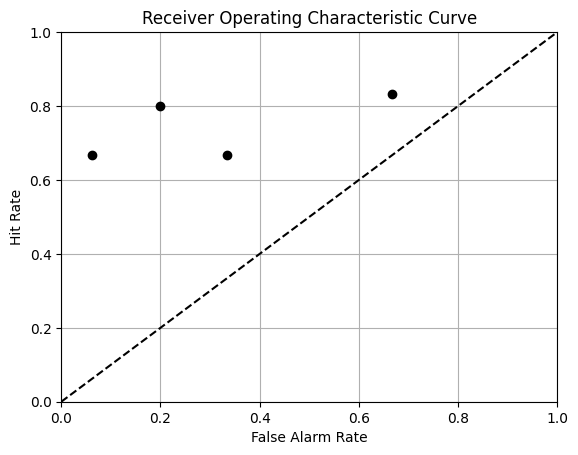

In [18]:
## Adding instance method nLogLikelihood()

import numpy as np
import scipy as spi
import unittest
import matplotlib.pyplot as plt


class SignalDetection:
    def __init__(self, hits, misses, false_alarms, correct_rejections):
        self.hits = hits
        self.misses = misses
        self.false_alarms = false_alarms
        self.correct_rejections = correct_rejections
    
    def hit_rate(self):
        return (self.hits / (self.hits + self.misses))

    def false_alarm_rate(self):
        return (self.false_alarms / (self.false_alarms + self.correct_rejections))

    def d_prime(self):
        return (spi.stats.norm.ppf(self.hit_rate()) - spi.stats.norm.ppf(self.false_alarm_rate()))

    def criterion(self):
        return -0.5 * (spi.stats.norm.ppf(self.hit_rate()) + spi.stats.norm.ppf(self.false_alarm_rate()))
    
    def __add__(self, other):
        return SignalDetection(self.hits + other.hits, self.misses + other.misses, self.false_alarms + other.false_alarms, self.correct_rejections + other.correct_rejections)
    
    def __mul__(self, scalar):
        return SignalDetection(self.hits * scalar, self.misses * scalar, self.false_alarms * scalar, self.correct_rejections * scalar)
    
    @staticmethod 
    def simulate(dprime, criteriaList, signalCount, noiseCount):
        sdtList = []
        for i in range(len(criteriaList)):
            criterion = criteriaList[i]
            k = criterion + (dprime/2)
            hitrate = 1 - spi.stats.norm.cdf(k - dprime)
            falsealarmrate = 1 - spi.stats.norm.cdf(k)
            hits = np.random.binomial(signalCount, hitrate)
            misses = signalCount - hits
            false_alarms = np.random.binomial(noiseCount, falsealarmrate)
            correct_rejections = noiseCount - false_alarms
            sdtList.append(SignalDetection(hits, misses, false_alarms, correct_rejections))
        return sdtList
    
    @staticmethod
    def plot_roc(sdtList):
        plt.figure()
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xlabel("False Alarm Rate")
        plt.ylabel("Hit Rate")
        plt.title("Receiver Operating Characteristic Curve")
        for sdt in sdtList:
            plt.plot(sdt.false_alarm_rate(), sdt.hit_rate(), 'o', color = 'black')
        x, y = np.linspace(0,1,100), np.linspace(0,1,100)
        plt.plot(x,y, '--', color = 'black')
        plt.grid()

    def nLogLikelihood(self, hit_rate, false_alarm_rate):
        return -((self.hits * np.log(hit_rate)) + (self.misses * np.log(1-hit_rate)) + (self.false_alarms * np.log(false_alarm_rate)) + (self.correct_rejections * np.log(1-false_alarm_rate)))
    
sdtList = [SignalDetection(20, 10, 5, 10), SignalDetection(25, 5, 10, 5), SignalDetection(30, 15, 1, 15), SignalDetection(8, 2, 2, 8),]
SignalDetection.plot_roc(sdtList)

class TestSignalDetection(unittest.TestCase):
    """
    Test suite for SignalDetection class.
    """

    def test_d_prime_zero(self):
        """
        Test d-prime calculation when hits and false alarms are 0.
        """
        sd   = SignalDetection(15, 5, 15, 5)
        expected = 0
        obtained = sd.d_prime()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_d_prime_nonzero(self):
        """
        Test d-prime calculation when hits and false alarms are nonzero.
        """
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.421142647060282
        obtained = sd.d_prime()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_zero(self):
        """
        Test criterion calculation when hits and false alarms are both 0.
        """
        sd   = SignalDetection(5, 5, 5, 5)
        expected = 0
        obtained = sd.criterion()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_nonzero(self):
        """
        Test criterion calculation when hits and false alarms are nonzero.
        """
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.463918426665941
        obtained = sd.criterion()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_addition(self):
        """
        Test addition of two SignalDetection objects.
        """
        sd = SignalDetection(1, 1, 2, 1) + SignalDetection(2, 1, 1, 3)
        expected = SignalDetection(3, 2, 3, 4).criterion()
        obtained = sd.criterion()
        self.assertEqual(obtained, expected)

    def test_multiplication(self):
        """
        Test multiplication of a SignalDetection object with a scalar.
        """
        sd = SignalDetection(1, 2, 3, 1) * 4
        expected = SignalDetection(4, 8, 12, 4).criterion()
        obtained = sd.criterion()
        self.assertEqual(obtained, expected)

    def test_simulate_single_criterion(self):
        """
        Test SignalDetection.simulate method with a single criterion value.
        """
        dPrime       = 1.5
        criteriaList = [0]
        signalCount  = 1000
        noiseCount   = 1000
        
        sdtList      = SignalDetection.simulate(dPrime, criteriaList, signalCount, noiseCount)
        self.assertEqual(len(sdtList), 1)
        sdt = sdtList[0]
        
        self.assertEqual(sdt.hits             , sdtList[0].hits)
        self.assertEqual(sdt.misses           , sdtList[0].misses)
        self.assertEqual(sdt.false_alarms      , sdtList[0].false_alarms)
        self.assertEqual(sdt.correct_rejections, sdtList[0].correct_rejections)

    def test_simulate_multiple_criteria(self):
        """
        Test SignalDetection.simulate method with multiple criterion values.
        """
        dPrime       = 1.5
        criteriaList = [-0.5, 0, 0.5]
        signalCount  = 1000
        noiseCount   = 1000
        sdtList      = SignalDetection.simulate(dPrime, criteriaList, signalCount, noiseCount)
        self.assertEqual(len(sdtList), 3)
        for sdt in sdtList:
            self.assertLessEqual (sdt.hits              ,  signalCount)
            self.assertLessEqual (sdt.misses            ,  signalCount)
            self.assertLessEqual (sdt.false_alarms       ,  noiseCount)
            self.assertLessEqual (sdt.correct_rejections ,  noiseCount)

    def test_nLogLikelihood(self):
        """
        Test case to verify nLogLikelihood calculation for a SignalDetection object.
        """
        sdt = SignalDetection(10, 5, 3, 12)
        hit_rate = 0.5
        false_alarm_rate = 0.2
        expected_nll = - (10 * np.log(hit_rate) +
                           5 * np.log(1-hit_rate) +
                           3 * np.log(false_alarm_rate) +
                          12 * np.log(1-false_alarm_rate))
        self.assertAlmostEqual(sdt.nLogLikelihood(hit_rate, false_alarm_rate),
                               expected_nll, places=6)
if __name__ == '__main__':
    unittest.main(argv=['ignored'], exit=False)

In [58]:
## adding static method rocCurve()

import numpy as np
import scipy as spi
import unittest
import matplotlib.pyplot as plt


class SignalDetection:
    def __init__(self, hits, misses, false_alarms, correct_rejections):
        self.hits = hits
        self.misses = misses
        self.false_alarms = false_alarms
        self.correct_rejections = correct_rejections
    
    def hit_rate(self):
        return (self.hits / (self.hits + self.misses))

    def false_alarm_rate(self):
        return (self.false_alarms / (self.false_alarms + self.correct_rejections))

    def d_prime(self):
        return (spi.stats.norm.ppf(self.hit_rate()) - spi.stats.norm.ppf(self.false_alarm_rate()))

    def criterion(self):
        return -0.5 * (spi.stats.norm.ppf(self.hit_rate()) + spi.stats.norm.ppf(self.false_alarm_rate()))
    
    def __add__(self, other):
        return SignalDetection(self.hits + other.hits, self.misses + other.misses, self.false_alarms + other.false_alarms, self.correct_rejections + other.correct_rejections)
    
    def __mul__(self, scalar):
        return SignalDetection(self.hits * scalar, self.misses * scalar, self.false_alarms * scalar, self.correct_rejections * scalar)
    
    @staticmethod
    def simulate(dprime, criteriaList, signalCount, noiseCount):
        sdtList = []
        for i in range(len(criteriaList)):
            criteria = criteriaList[i]
            hits = np.random.binomial(signalCount, spi.stats.norm.cdf(dprime + criteria))
            misses = signalCount - hits
            false_alarms = np.random.binomial(noiseCount, spi.stats.norm.cdf(criteria))
            correct_rejections = noiseCount - false_alarms
            sdtList.append(SignalDetection(hits, misses, false_alarms, correct_rejections))
        return sdtList
    
    @staticmethod
    def plot_roc(sdtList):
        plt.figure()
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xlabel("False Alarm Rate")
        plt.ylabel("Hit Rate")
        plt.title("Receiver Operating Characteristic Curve")
        for sdt in sdtList:
            plt.plot(sdt.false_alarm_rate(), sdt.hit_rate(), 'o', color = 'black')
        x, y = np.linspace(0,1,100), np.linspace(0,1,100)
        plt.plot(x,y, '--', color = 'black')
        plt.grid()

    def nLogLikelihood(self, hit_rate, false_alarm_rate):
        return -((self.hits * np.log(hit_rate)) + (self.misses * np.log(1-hit_rate)) + (self.false_alarms * np.log(false_alarm_rate)) + (self.correct_rejections * np.log(1-false_alarm_rate)))

    @staticmethod
    def rocCurve(falseAlarmRate, a):
        return spi.stats.norm.cdf(a + spi.stats.norm.ppf((falseAlarmRate)))
    
class TestSignalDetection(unittest.TestCase):
    """
    Test suite for SignalDetection class.
    """

    def test_d_prime_zero(self):
        """
        Test d-prime calculation when hits and false alarms are 0.
        """
        sd   = SignalDetection(15, 5, 15, 5)
        expected = 0
        obtained = sd.d_prime()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_d_prime_nonzero(self):
        """
        Test d-prime calculation when hits and false alarms are nonzero.
        """
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.421142647060282
        obtained = sd.d_prime()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_zero(self):
        """
        Test criterion calculation when hits and false alarms are both 0.
        """
        sd   = SignalDetection(5, 5, 5, 5)
        expected = 0
        obtained = sd.criterion()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_nonzero(self):
        """
        Test criterion calculation when hits and false alarms are nonzero.
        """
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.463918426665941
        obtained = sd.criterion()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_addition(self):
        """
        Test addition of two SignalDetection objects.
        """
        sd = SignalDetection(1, 1, 2, 1) + SignalDetection(2, 1, 1, 3)
        expected = SignalDetection(3, 2, 3, 4).criterion()
        obtained = sd.criterion()
        self.assertEqual(obtained, expected)

    def test_multiplication(self):
        """
        Test multiplication of a SignalDetection object with a scalar.
        """
        sd = SignalDetection(1, 2, 3, 1) * 4
        expected = SignalDetection(4, 8, 12, 4).criterion()
        obtained = sd.criterion()
        self.assertEqual(obtained, expected)

    def test_simulate_single_criterion(self):
        """
        Test SignalDetection.simulate method with a single criterion value.
        """
        dPrime       = 1.5
        criteriaList = [0]
        signalCount  = 1000
        noiseCount   = 1000
        
        sdtList      = SignalDetection.simulate(dPrime, criteriaList, signalCount, noiseCount)
        self.assertEqual(len(sdtList), 1)
        sdt = sdtList[0]
        
        self.assertEqual(sdt.hits             , sdtList[0].hits)
        self.assertEqual(sdt.misses           , sdtList[0].misses)
        self.assertEqual(sdt.false_alarms      , sdtList[0].false_alarms)
        self.assertEqual(sdt.correct_rejections, sdtList[0].correct_rejections)

    def test_simulate_multiple_criteria(self):
        """
        Test SignalDetection.simulate method with multiple criterion values.
        """
        dPrime       = 1.5
        criteriaList = [-0.5, 0, 0.5]
        signalCount  = 1000
        noiseCount   = 1000
        sdtList      = SignalDetection.simulate(dPrime, criteriaList, signalCount, noiseCount)
        self.assertEqual(len(sdtList), 3)
        for sdt in sdtList:
            self.assertLessEqual (sdt.hits              ,  signalCount)
            self.assertLessEqual (sdt.misses            ,  signalCount)
            self.assertLessEqual (sdt.false_alarms       ,  noiseCount)
            self.assertLessEqual (sdt.correct_rejections ,  noiseCount)

    def test_nLogLikelihood(self):
        """
        Test case to verify nLogLikelihood calculation for a SignalDetection object.
        """
        sdt = SignalDetection(10, 5, 3, 12)
        hit_rate = 0.5
        false_alarm_rate = 0.2
        expected_nll = - (10 * np.log(hit_rate) +
                           5 * np.log(1-hit_rate) +
                           3 * np.log(false_alarm_rate) +
                          12 * np.log(1-false_alarm_rate))
        self.assertAlmostEqual(sdt.nLogLikelihood(hit_rate, false_alarm_rate),
                               expected_nll, places=6)
if __name__ == '__main__':
    unittest.main(argv=['ignored'], exit=False)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.013s

OK


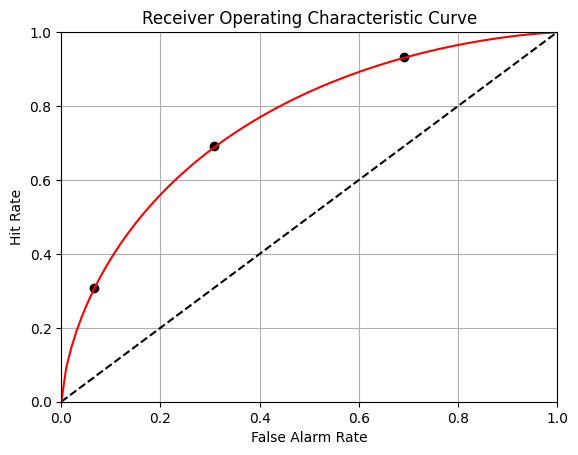

...........
----------------------------------------------------------------------
Ran 11 tests in 0.087s

OK


In [60]:
## adding static methods fit_roc and rocLoss

import numpy as np
import scipy as spi
import unittest
import matplotlib.pyplot as plt


class SignalDetection:
    def __init__(self, hits, misses, false_alarms, correct_rejections):
        self.hits = hits
        self.misses = misses
        self.false_alarms = false_alarms
        self.correct_rejections = correct_rejections
    
    def hit_rate(self):
        return (self.hits / (self.hits + self.misses))

    def false_alarm_rate(self):
        return (self.false_alarms / (self.false_alarms + self.correct_rejections))

    def d_prime(self):
        return (spi.stats.norm.ppf(self.hit_rate()) - spi.stats.norm.ppf(self.false_alarm_rate()))

    def criterion(self):
        return -0.5 * (spi.stats.norm.ppf(self.hit_rate()) + spi.stats.norm.ppf(self.false_alarm_rate()))
    
    def __add__(self, other):
        return SignalDetection(self.hits + other.hits, self.misses + other.misses, self.false_alarms + other.false_alarms, self.correct_rejections + other.correct_rejections)
    
    def __mul__(self, scalar):
        return SignalDetection(self.hits * scalar, self.misses * scalar, self.false_alarms * scalar, self.correct_rejections * scalar)
    
    @staticmethod 
    def simulate(dprime, criteriaList, signalCount, noiseCount):
        sdtList = []
        for i in range(len(criteriaList)):
            criterion = criteriaList[i]
            k = criterion + (dprime/2)
            hit_rate = 1 - spi.stats.norm.cdf(k - dprime)
            false_alarm_rate = 1 - spi.stats.norm.cdf(k)
            hits = np.random.binomial(signalCount, hit_rate)
            misses = signalCount - hits
            false_alarms = np.random.binomial(noiseCount, false_alarm_rate)
            correct_rejections = noiseCount - false_alarms
            sdtList.append(SignalDetection(hits, misses, false_alarms, correct_rejections))
        return sdtList
    
    @staticmethod
    def plot_roc(sdtList):
        plt.figure()
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xlabel("False Alarm Rate")
        plt.ylabel("Hit Rate")
        plt.title("Receiver Operating Characteristic Curve")
        if isinstance(sdtList, list):
            for i in range(len(sdtList)):
                sdt = sdtList[i]
                plt.plot(sdt.false_alarm_rate(), sdt.hit_rate(), 'o', color = 'black')
        x, y = np.linspace(0,1,100), np.linspace(0,1,100)
        plt.plot(x,y, '--', color = 'black')
        plt.grid()

    def nLogLikelihood(self, hit_rate, false_alarm_rate):
        return -((self.hits * np.log(hit_rate)) + (self.misses * np.log(1-hit_rate)) + (self.false_alarms * np.log(false_alarm_rate)) + (self.correct_rejections * np.log(1-false_alarm_rate)))

    @staticmethod
    def rocCurve(falseAlarmRate, a):
        return spi.stats.norm.cdf(a + spi.stats.norm.ppf((falseAlarmRate)))
    
    @staticmethod
    def fit_roc(sdtList):
        SignalDetection.plot_roc(sdtList)
        a = 0
        minimize = spi.optimize.minimize(fun = SignalDetection.rocLoss, x0 = a, method = 'nelder-mead', args = (sdtList))
        losscurve = []
        for i in range(0,100,1):
            losscurve.append((SignalDetection.rocCurve(i/100, float(minimize.x))))
        plt.plot(np.linspace(0,1,100), losscurve, '-', color = 'r')
        aHat = minimize.x
        return float(aHat)
    
    @staticmethod
    def rocLoss(a, sdtList):
        total_loss = []
        for i in range(len(sdtList)):
            s = sdtList[i]
            predicted_hit_rate = s.rocCurve(s.false_alarm_rate(), a)
            total_loss.append(s.nLogLikelihood(predicted_hit_rate, s.false_alarm_rate()))
        return sum(total_loss)

sdtList = SignalDetection.simulate(1, [-1, 0, 1], 1e7, 1e7)
SignalDetection.fit_roc(sdtList)
plt.show()
    
class TestSignalDetection(unittest.TestCase):
    """
    Test suite for SignalDetection class.
    """

    def test_d_prime_zero(self):
        """
        Test d-prime calculation when hits and false alarms are 0.
        """
        sd   = SignalDetection(15, 5, 15, 5)
        expected = 0
        obtained = sd.d_prime()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_d_prime_nonzero(self):
        """
        Test d-prime calculation when hits and false alarms are nonzero.
        """
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.421142647060282
        obtained = sd.d_prime()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_zero(self):
        """
        Test criterion calculation when hits and false alarms are both 0.
        """
        sd   = SignalDetection(5, 5, 5, 5)
        expected = 0
        obtained = sd.criterion()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_criterion_nonzero(self):
        """
        Test criterion calculation when hits and false alarms are nonzero.
        """
        sd   = SignalDetection(15, 10, 15, 5)
        expected = -0.463918426665941
        obtained = sd.criterion()
        self.assertAlmostEqual(obtained, expected, places=10)

    def test_addition(self):
        """
        Test addition of two SignalDetection objects.
        """
        sd = SignalDetection(1, 1, 2, 1) + SignalDetection(2, 1, 1, 3)
        expected = SignalDetection(3, 2, 3, 4).criterion()
        obtained = sd.criterion()
        self.assertEqual(obtained, expected)

    def test_multiplication(self):
        """
        Test multiplication of a SignalDetection object with a scalar.
        """
        sd = SignalDetection(1, 2, 3, 1) * 4
        expected = SignalDetection(4, 8, 12, 4).criterion()
        obtained = sd.criterion()
        self.assertEqual(obtained, expected)

    def test_simulate_single_criterion(self):
        """
        Test SignalDetection.simulate method with a single criterion value.
        """
        dPrime       = 1.5
        criteriaList = [0]
        signalCount  = 1000
        noiseCount   = 1000
        
        sdtList      = SignalDetection.simulate(dPrime, criteriaList, signalCount, noiseCount)
        self.assertEqual(len(sdtList), 1)
        sdt = sdtList[0]
        
        self.assertEqual(sdt.hits             , sdtList[0].hits)
        self.assertEqual(sdt.misses           , sdtList[0].misses)
        self.assertEqual(sdt.false_alarms      , sdtList[0].false_alarms)
        self.assertEqual(sdt.correct_rejections, sdtList[0].correct_rejections)

    def test_simulate_multiple_criteria(self):
        """
        Test SignalDetection.simulate method with multiple criterion values.
        """
        dPrime       = 1.5
        criteriaList = [-0.5, 0, 0.5]
        signalCount  = 1000
        noiseCount   = 1000
        sdtList      = SignalDetection.simulate(dPrime, criteriaList, signalCount, noiseCount)
        self.assertEqual(len(sdtList), 3)
        for sdt in sdtList:
            self.assertLessEqual (sdt.hits              ,  signalCount)
            self.assertLessEqual (sdt.misses            ,  signalCount)
            self.assertLessEqual (sdt.false_alarms       ,  noiseCount)
            self.assertLessEqual (sdt.correct_rejections ,  noiseCount)

    def test_nLogLikelihood(self):
        """
        Test case to verify nLogLikelihood calculation for a SignalDetection object.
        """
        sdt = SignalDetection(10, 5, 3, 12)
        hit_rate = 0.5
        false_alarm_rate = 0.2
        expected_nll = - (10 * np.log(hit_rate) +
                           5 * np.log(1-hit_rate) +
                           3 * np.log(false_alarm_rate) +
                          12 * np.log(1-false_alarm_rate))
        self.assertAlmostEqual(sdt.nLogLikelihood(hit_rate, false_alarm_rate),
                               expected_nll, places=6)

    def test_rocLoss(self):
        """
        Test case to verify rocLoss calculation for a list of SignalDetection objects.
        """
        sdtList = [
            SignalDetection( 8, 2, 1, 9),
            SignalDetection(14, 1, 2, 8),
            SignalDetection(10, 3, 1, 9),
            SignalDetection(11, 2, 2, 8),
        ]
        a = 0
        expected = 99.3884
        self.assertAlmostEqual(SignalDetection.rocLoss(a, sdtList), expected, places=4)
        
    def test_integration(self):
        """
        Test case to verify integration of SignalDetection simulation and ROC fitting.
        """
        dPrime  = 1
        sdtList = SignalDetection.simulate(dPrime, [-1, 0, 1], 1e7, 1e7)
        aHat    = SignalDetection.fit_roc(sdtList)
        self.assertAlmostEqual(aHat, dPrime, places=2)
        plt.close()

if __name__ == '__main__':
    unittest.main(argv=['ignored'], exit=False)